#### Binary Clasification

In [98]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

# Генерація синтетичного набору даних
np.random.seed(0)
size = 10000
grades = np.random.randint(0, 100, size)
study_hours = np.random.randint(0, 40, size)
labels = np.where((grades > 50) & (study_hours > 20), 1, 0)

# Створення DataFrame
df_binary = pd.DataFrame({'Grade': grades, 'StudyHours': study_hours, 'Passed': labels})
print(df_binary.tail(10))


      Grade  StudyHours  Passed
9990     16          22       0
9991     85          22       1
9992     69          39       1
9993     14          35       0
9994     75          12       0
9995      7          16       0
9996     29          23       0
9997     39           3       0
9998     72          10       0
9999     48          39       0


In [106]:
# Підготовка даних для бінарної класифікації
X = df_binary[['Grade', 'StudyHours']].values
y = df_binary['Passed'].values

# Поділ на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_binary = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_binary = model_binary.fit(X_train, y_train, epochs=70, validation_split=0.1)


Epoch 1/70
225/225 [==============================] - 1s 2ms/step - loss: 1.3529 - accuracy: 0.7674 - val_loss: 0.5590 - val_accuracy: 0.7350
Epoch 2/70
225/225 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7697 - val_loss: 0.5179 - val_accuracy: 0.7563
Epoch 3/70
225/225 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7754 - val_loss: 0.4004 - val_accuracy: 0.7563
Epoch 4/70
225/225 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8343 - val_loss: 0.3048 - val_accuracy: 0.8850
Epoch 5/70
225/225 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9310 - val_loss: 0.2347 - val_accuracy: 0.9038
Epoch 6/70
225/225 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9521 - val_loss: 0.1727 - val_accuracy: 0.9563
Epoch 7/70
225/225 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.9551 - val_loss: 0.1488 - val_accuracy: 0.9538
Epoch 

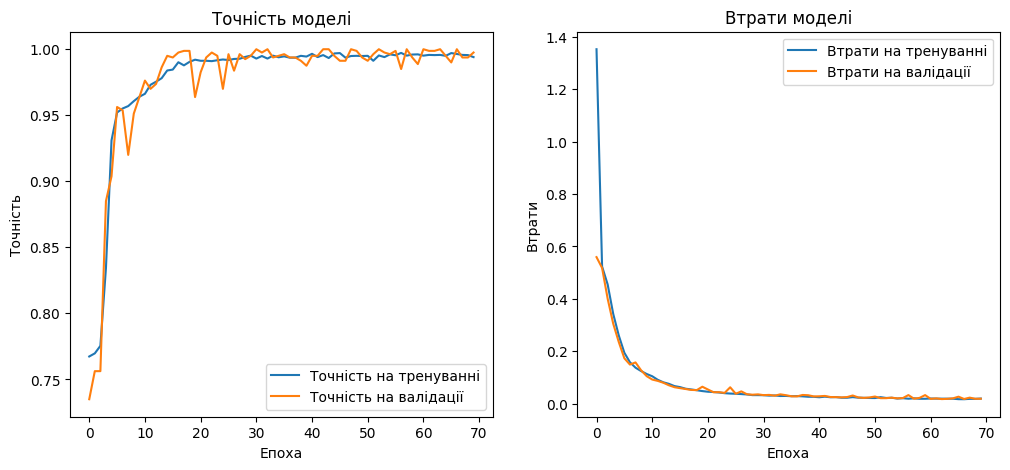

In [107]:
# Візуалізація точності та втрат для бінарної класифікації
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_binary.history['accuracy'], label='Точність на тренуванні')
plt.plot(history_binary.history['val_accuracy'], label='Точність на валідації')
plt.title('Точність моделі')
plt.ylabel('Точність')
plt.xlabel('Епоха')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_binary.history['loss'], label='Втрати на тренуванні')
plt.plot(history_binary.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі')
plt.ylabel('Втрати')
plt.xlabel('Епоха')
plt.legend()

plt.show()


#### Multi-Class Clasification

In [101]:
# Додавання мультикласових міток
group_projects = np.random.randint(0, 2, size)  # Участь у групових проектах (так=1, ні=0)
conditions = [
    (grades > 85),
    (grades > 70) & (grades <= 85),
    (grades <= 70)
]
choices = ['високий', 'середній', 'низький']
multiclass_labels = np.select(conditions, choices)

df_multiclass = pd.DataFrame({'Grade': grades, 'StudyHours': study_hours, 'GroupProjects': group_projects, 'Performance': multiclass_labels})
print(df_multiclass.head(10))


   Grade  StudyHours  GroupProjects Performance
0     44          39              0     низький
1     47          15              1     низький
2     64          34              1     низький
3     67          17              1     низький
4     67          10              0     низький
5      9           6              0     низький
6     83          39              1    середній
7     21          10              1     низький
8     36          15              0     низький
9     87          15              0     високий


In [108]:
# Підготовка даних для мультикласової класифікації
X_multiclass = df_multiclass[['Grade', 'StudyHours', 'GroupProjects']].values
y_multiclass = pd.get_dummies(df_multiclass['Performance']).values

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=0)


# Створення моделі для мультикласової класифікації
model_multiclass = Sequential([
    Dense(5, activation='relu', input_shape=(3,)),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    Dense(3, activation='softmax')  # 3 класи вихідного шару
])

model_multiclass.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_multiclass = model_multiclass.fit(X_train_multi, y_train_multi, epochs=50, validation_split=0.2)



Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 1.1506 - accuracy: 0.5925 - val_loss: 0.7371 - val_accuracy: 0.8425
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7812 - val_loss: 0.5707 - val_accuracy: 0.8712
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8394 - val_loss: 0.5069 - val_accuracy: 0.8288
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8384 - val_loss: 0.4665 - val_accuracy: 0.8319
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8620 - val_loss: 0.4126 - val_accuracy: 0.8819
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8734 - val_loss: 0.3880 - val_accuracy: 0.8425
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8769 - val_loss: 0.3613 - val_accuracy: 0.8819
Epoch 

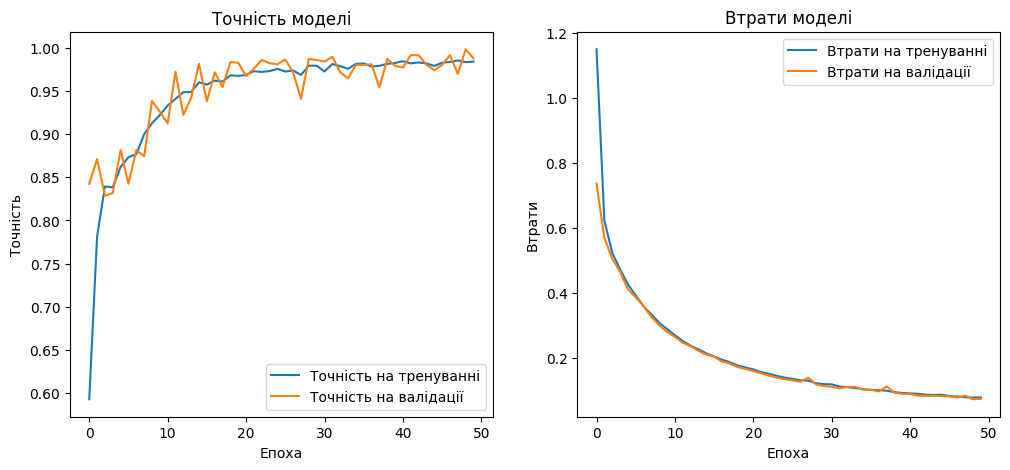

In [109]:
# Візуалізація точності та втрат для мультикласової класифікації
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_multiclass.history['accuracy'], label='Точність на тренуванні')
plt.plot(history_multiclass.history['val_accuracy'], label='Точність на валідації')
plt.title('Точність моделі')
plt.ylabel('Точність')
plt.xlabel('Епоха')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_multiclass.history['loss'], label='Втрати на тренуванні')
plt.plot(history_multiclass.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі')
plt.ylabel('Втрати')
plt.xlabel('Епоха')
plt.legend()

plt.show()

